In [248]:
import pandas as pd
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.timeseries import TimeSeries
from matplotlib import pyplot as plt
from pandas_datareader import data as pdr
import pandas_ta as ta
import talib
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.io as pio
sns.set_theme(color_codes=True)
API_KEY = 'EC1W3AWVDZ3LA1T8'
ts= TimeSeries(key=API_KEY,output_format='pandas' )
ti = TechIndicators(key=API_KEY,output_format='pandas')

In [249]:
data, meta_data = ts.get_intraday(symbol='TSLA',interval='1min', outputsize='full')
data['Close']= data['4. close']
data.drop(['4. close'],axis=1,inplace=True)
data

,1. open,2. high,3. low,5. volume,Close
date,,,,,
2022-04-28 20:00:00,854.5000,854.61,854.0100,2404.0,854.4999
2022-04-28 19:59:00,854.0601,855.00,854.0601,3325.0,854.5400
2022-04-28 19:58:00,855.5000,855.50,854.9800,1269.0,855.0000
2022-04-28 19:57:00,855.7900,855.79,855.4700,2318.0,855.4700
2022-04-28 19:56:00,855.2000,855.78,855.0000,1536.0,855.7700
...,...,...,...,...,...
2022-04-18 04:05:00,992.0100,992.77,992.0000,2055.0,992.7700
2022-04-18 04:04:00,990.0000,990.00,990.0000,1935.0,990.0000
2022-04-18 04:03:00,988.0000,988.00,987.8900,1710.0,987.8900


Using pandas support we can plot the intra-minute value for 'MSFT' stock quite easily:

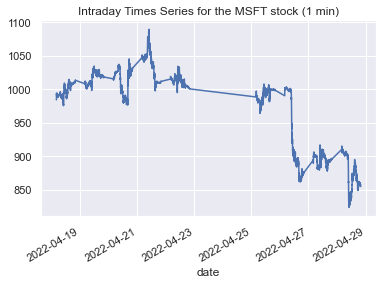

In [250]:
data['Close'].plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.show()

In [251]:
# data, meta_data = ti.get_bbands(symbol='MSFT', interval='60min', time_period=60)
# data.plot()
# plt.title('BBbands indicator for  MSFT stock (60 min)')
# plt.show()

In [252]:
# df= pdr.get_data_yahoo()
# df.ta
# df.ta.log_return(cumulative=True, append=True)
# df.ta.percent_return(cumulative=True, append=True)
# df.columns
# df.ta.indicators()
# df.ta.sma(10, append=True)
# df.ta.ema(10, append=True)
# df.ta.zscore(10, append=True)
# df.ta.ao()
# df.ta.macd(append=True)
# df

df = data


In [253]:
time_period =100
a = talib.SMA(df['Close'], timeperiod=time_period)
type(a)


pandas.core.series.Series

In [254]:
b = talib.EMA(df['Close'], timeperiod=time_period)
b

date
2022-04-28 20:00:00           NaN
2022-04-28 19:59:00           NaN
2022-04-28 19:58:00           NaN
2022-04-28 19:57:00           NaN
2022-04-28 19:56:00           NaN
                          ...    
2022-04-18 04:05:00    991.108647
2022-04-18 04:04:00    991.086694
2022-04-18 04:03:00    991.023393
2022-04-18 04:02:00    990.884316
2022-04-18 04:01:00    990.752349
Length: 6766, dtype: float64

<AxesSubplot:xlabel='date'>

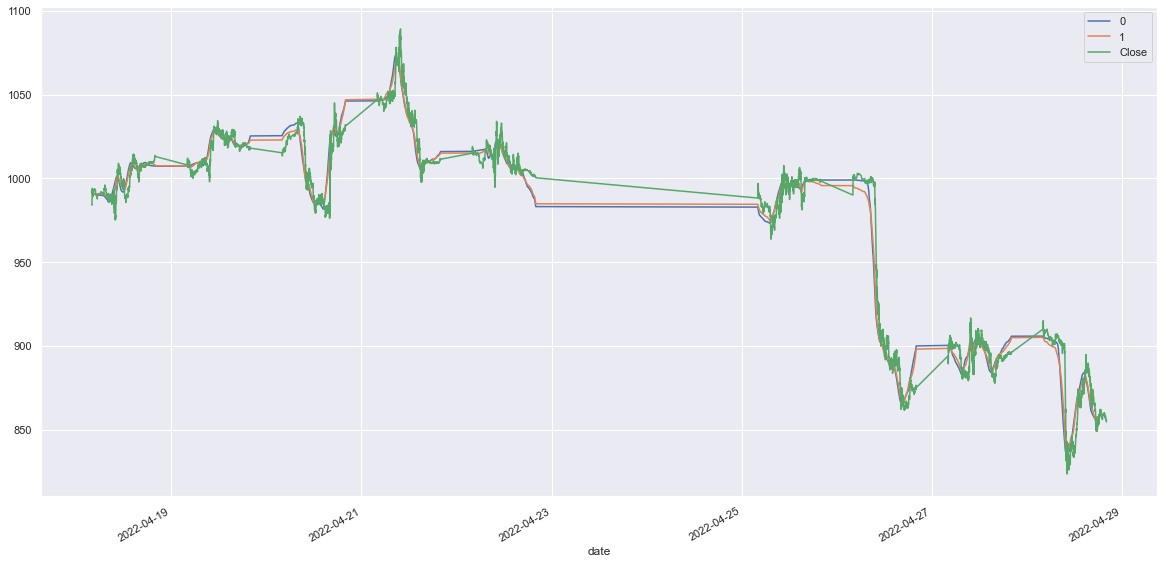

In [255]:
pd.concat([a,b,df['Close']],axis=1).plot(figsize=(20,10))


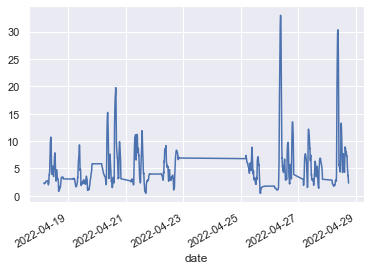

In [256]:
analy_df= pd.DataFrame(index=df.index)
analy_df['Close']= df['Close']
analy_df['SMA']= a
analy_df['EMA']= b
rolling_standard_deviation = pd.Series(talib.STDDEV(df['Close'], timeperiod=time_period), index=df.index)
rolling_standard_deviation.plot()
# analy_df['Rolling_Standard_Deviation']= rolling_standard_deviation
analy_df['upper_band']= analy_df['SMA'] + (2*rolling_standard_deviation)
analy_df['lower_band']= analy_df['SMA'] - (2*rolling_standard_deviation)

<AxesSubplot:xlabel='date'>

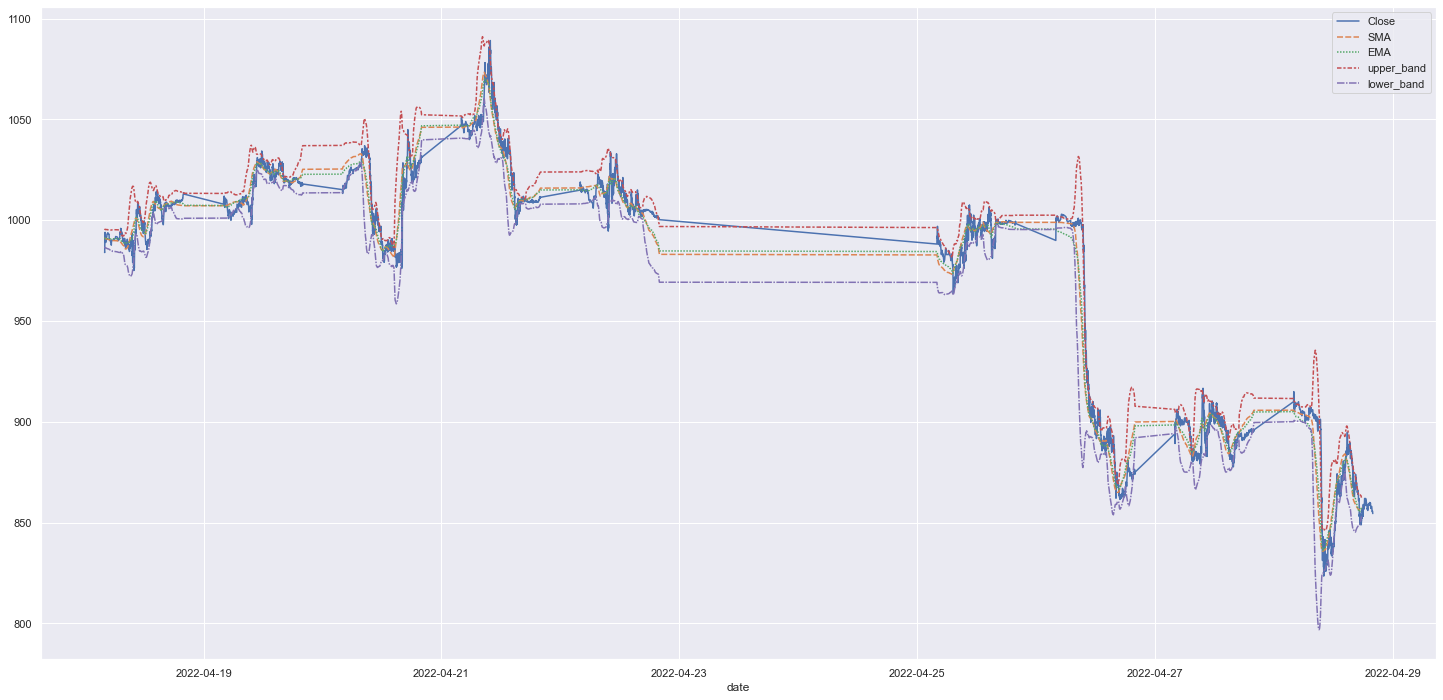

In [257]:
plt.figure(figsize=(25,12))
sns.lineplot(data=analy_df, )

In [258]:
pl

NameError: name 'pl' is not defined